In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS Sales (
    Id INTEGER PRIMARY KEY AUTOINCREMENT,
    Product VARCHAR(20),
    Quantity INTEGER,
    Price DECIMAL(10, 2)
)
''')

print("Sales table created successfully.")


Sales table created successfully.


In [3]:
data = [
    ('Laptop', 2, 800),
    ('Smartphone', 5, 500),
    ('Laptop', 1, 800),
    ('Headphones', 10, 100),
    ('Smartphone', 3, 500),
    ('Headphones', 5, 100),
    ('Tablet', 4, 300),
    ('Smartwatch', 6, 200),
    ('Laptop', 3, 850),
    ('Smartphone', 4, 520),
    ('Tablet', 2, 310),
    ('Smartwatch', 2, 190),
    ('Laptop', 1, 820),
    ('Headphones', 6, 110),
    ('Smartphone', 2, 530),
    ('Tablet', 1, 310),
    ('Laptop', 2, 840),
]

cursor.executemany("insert into Sales (Product, Quantity, Price) VALUES (?, ?, ?)",data)
conn.commit()

In [4]:
query = '''
select * from Sales
'''
df = pd.read_sql_query(query, conn)
print(df)


      Id     Product  Quantity  Price
0      1      Laptop         2    800
1      2  Smartphone         5    500
2      3      Laptop         1    800
3      4  Headphones        10    100
4      5  Smartphone         3    500
..   ...         ...       ...    ...
148  149      Laptop         1    820
149  150  Headphones         6    110
150  151  Smartphone         2    530
151  152      Tablet         1    310
152  153      Laptop         2    840

[153 rows x 4 columns]


In [5]:
query = """
select 
    Product, 
    SUM(Quantity) AS Total_Qty, 
    SUM(Quantity * Price) AS Revenue 
from Sales 
group by Product
"""
df = pd.read_sql_query(query, conn)
print(df)


      Product  Total_Qty  Revenue
0  Headphones        189    19440
1      Laptop         81    67050
2  Smartphone        126    64260
3  Smartwatch         72    14220
4      Tablet         63    19170


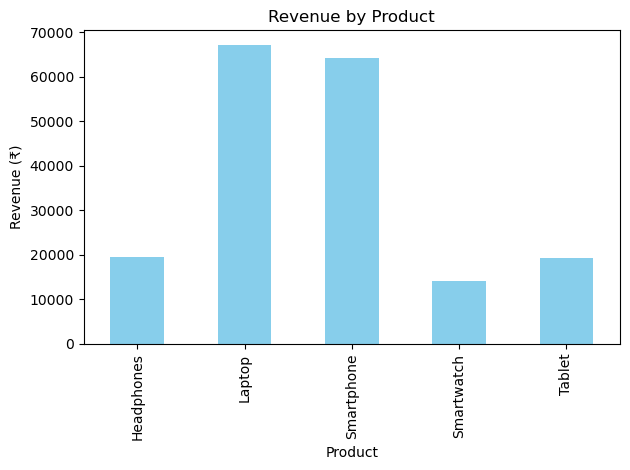

In [6]:
df.plot(kind='bar', x='Product', y='Revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.savefig("Screenshots/Revenue_by_Product.png") 
plt.show()

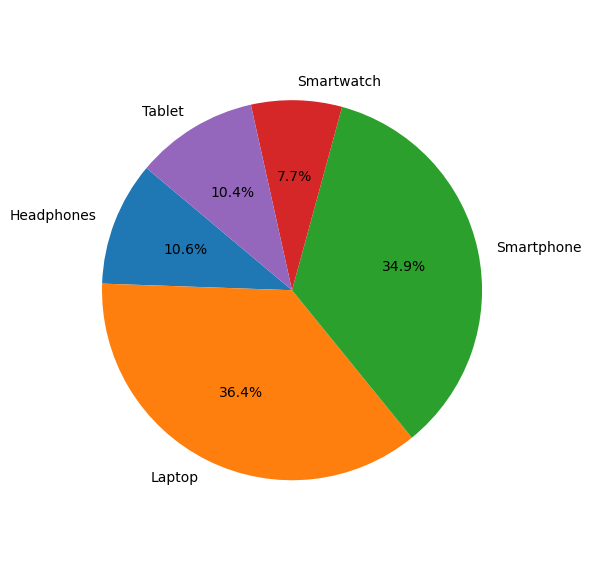

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(df['Revenue'], labels=df['Product'], autopct='%1.1f%%', startangle=140)
plt.title("")
plt.axis('equal')
plt.tight_layout()
plt.savefig("Screenshots/Revenue_Share_by_Product.png") 
plt.show()

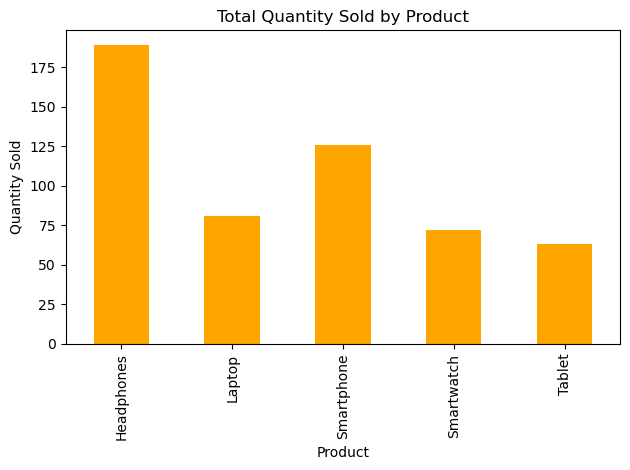

In [8]:
df.plot(kind='bar', x='Product', y='Total_Qty', color='orange', legend=False)
plt.title("Total Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.savefig("Screenshots/Total_Quantity_sold_by_Product.png")
plt.show()
